Import necessary modules for cleaning and visualitation

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import water cosumption database from the first link provided from Aigües de Barcelona

In [30]:
data = pd.read_parquet("Mostra Set de dades 1_ Consum total agregat.parquet")

Get some information regarding the database

In [31]:
data.shape

(963419, 7)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963419 entries, 0 to 963418
Data columns (total 7 columns):
 #   Column                                                                             Non-Null Count   Dtype 
---  ------                                                                             --------------   ----- 
 0   Secció censal/Sección censal/Census section                                        962324 non-null  object
 1   Districte/Distrito/District                                                        962324 non-null  object
 2   Municipi/Municipio/Municipality                                                    963419 non-null  object
 3   Data/Fecha/Date                                                                    963419 non-null  object
 4   Ús/Uso/Use                                                                         963419 non-null  object
 5   Nombre de comptadors/Número de contadores/Number of meters                         963419 non-null  i

In [18]:
data.head()

,Secció censal/Sección censal/Census section,Districte/Distrito/District,Municipi/Municipio/Municipality,Data/Fecha/Date,Ús/Uso/Use,Nombre de comptadors/Número de contadores/Number of meters,Consum acumulat (L/dia)/Consumo acumulado (L/día)/Accumulated consumption (L/day)
0,801901001,1,BARCELONA,2023-01-01,Comercial/Comercial/Commercial,64,14258
1,801901001,1,BARCELONA,2023-01-01,Domèstic/Doméstico/Domestic,395,11089
2,801901001,1,BARCELONA,2023-01-01,Industrial/Industrial/Industrial,20,490360
3,801901001,1,BARCELONA,2023-01-02,Comercial/Comercial/Commercial,64,6780
4,801901001,1,BARCELONA,2023-01-02,Domèstic/Doméstico/Domestic,395,11571


In [32]:
data.describe(include='all')

,Secció censal/Sección censal/Census section,Districte/Distrito/District,Municipi/Municipio/Municipality,Data/Fecha/Date,Ús/Uso/Use,Nombre de comptadors/Número de contadores/Number of meters,Consum acumulat (L/dia)/Consumo acumulado (L/día)/Accumulated consumption (L/day)
count,962324,962324,963419,963419,963419,963419.000000,9.634190e+05
unique,1075,13,1,365,3,NaN,NaN
top,<NULL>,2,BARCELONA,2023-12-31,Domèstic/Doméstico/Domestic,NaN,NaN
freq,1095,162450,963419,2680,392307,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,252.194256,2.374084e+04
std,NaN,NaN,NaN,NaN,NaN,283.118277,2.261520e+05
min,NaN,NaN,NaN,NaN,NaN,2.000000,-1.642869e+06
25%,NaN,NaN,NaN,NaN,NaN,25.000000,3.832000e+03
50%,NaN,NaN,NaN,NaN,NaN,70.000000,8.079000e+03
75%,NaN,NaN,NaN,NaN,NaN,493.000000,1.503100e+04


Rename the columns so we don´t have any errors with formatting

In [33]:
data.columns = ['Seccio_censal', 'Districte', 'Municipi', 'Data', 'Tipus_us', 'Numero_de_comptadors', 'Consum_litres_per_dia' ]

Clean null values

In [34]:
data = data.dropna()

Convert columns to correct type

In [35]:
data['Seccio_censal'] = data['Seccio_censal'].astype('Int64')   # nullable integer
data['Districte'] = data['Districte'].astype('Int64')
data['Numero_de_comptadors'] = data['Numero_de_comptadors'].astype('Int64')

data.loc[:, 'Data'] = pd.to_datetime(data['Data'], errors='coerce')
data.loc[:, 'Seccio_censal'] = pd.to_numeric(data['Seccio_censal'], errors='coerce')
data.loc[:, 'Districte'] = pd.to_numeric(data['Districte'], errors='coerce')
data.loc[:, 'Numero_de_comptadors'] = pd.to_numeric(data['Numero_de_comptadors'], errors='coerce')
data.loc[:, 'Consum_litres_per_dia'] = pd.to_numeric(data['Consum_litres_per_dia'], errors='coerce')
data.loc[:, 'Municipi'] = data['Municipi'].astype(str)
data.loc[:, 'Tipus_us'] = data['Tipus_us'].astype(str)




ValueError: invalid literal for int() with base 10: '<NULL>'

The "tipus_us" column has values in 3 languages, put them in catalan

In [24]:
data['Tipus_us'] = data['Tipus_us'].str.split('/').str[-1].str.strip().str.lower()

Remove rows with negative or unrealistic consumption:

In [25]:
data = data[data['Consum_litres_per_dia'] > 0]

Remove duplicates

In [26]:
data = data.drop_duplicates()

Fix inconsistent categories

In [27]:
data['Municipi'] = data['Municipi'].str.strip().str.upper()
data['Tipus_us'] = data['Tipus_us'].str.strip().str.capitalize()

Check values have the right format

In [28]:
data.tail()

,Seccio_censal,Districte,Municipi,Data,Tipus_us,Numero_de_comptadors,Consum_litres_per_dia
962319,<NA>,<NA>,BARCELONA,2023-12-30 00:00:00,Domestic,2917,71934
962320,<NA>,<NA>,BARCELONA,2023-12-30 00:00:00,Industrial,301,417221
962321,<NA>,<NA>,BARCELONA,2023-12-31 00:00:00,Commercial,345,30746
962322,<NA>,<NA>,BARCELONA,2023-12-31 00:00:00,Domestic,2917,80369
962323,<NA>,<NA>,BARCELONA,2023-12-31 00:00:00,Industrial,301,410164


Values have now the right format and null values are removed

Create multiple tables per Tipus_us and and Districte

In [ ]:
import os

In [ ]:
output_dir = "tablas_pequenas"
os.makedirs(output_dir, exist_ok=True)

In [ ]:
tables = {}

for (district, tipus), group in data.groupby(['Districte', 'Tipus_us']):
    group = group.reset_index(drop=True)
    key = f"D{district}_{tipus}"
    tables[key] = group


for key, table in tables.items():
    table.to_csv(f"{key}.csv", index=False)

In [ ]:
for key, table in tables.items():
    # Reemplaza espacios o caracteres especiales en el nombre del archivo
    filename = f"{key.replace(' ', '_').replace('/', '-')}.csv"
    filepath = os.path.join(output_dir, filename)
    table.to_csv(filepath, index=False, encoding='utf-8')

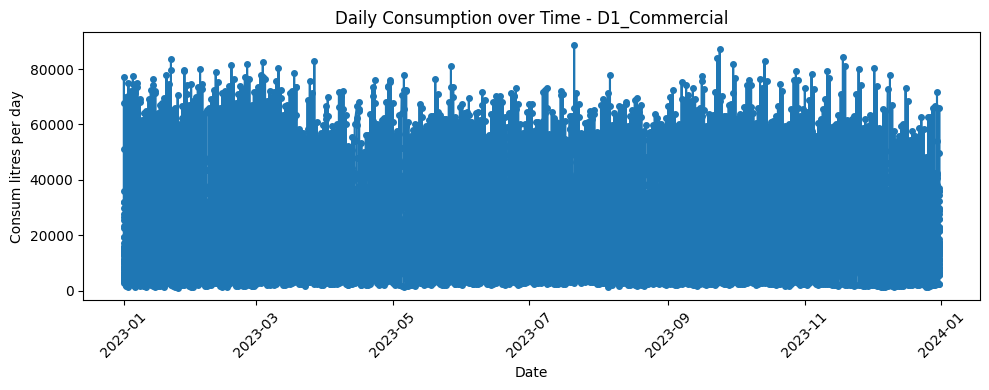

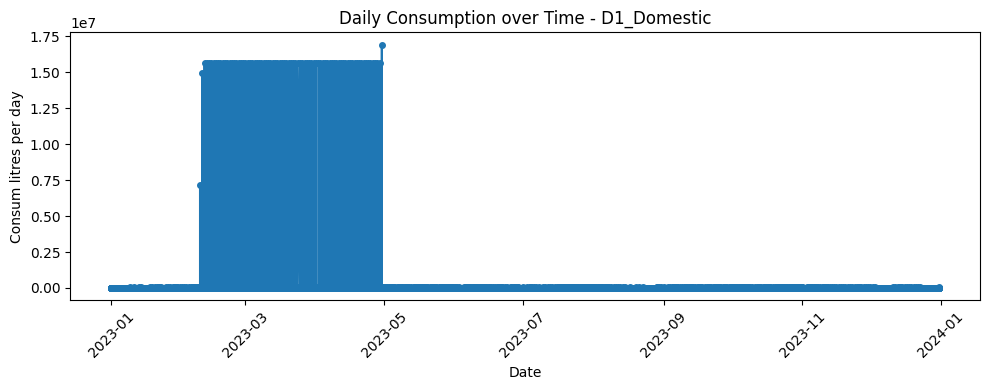

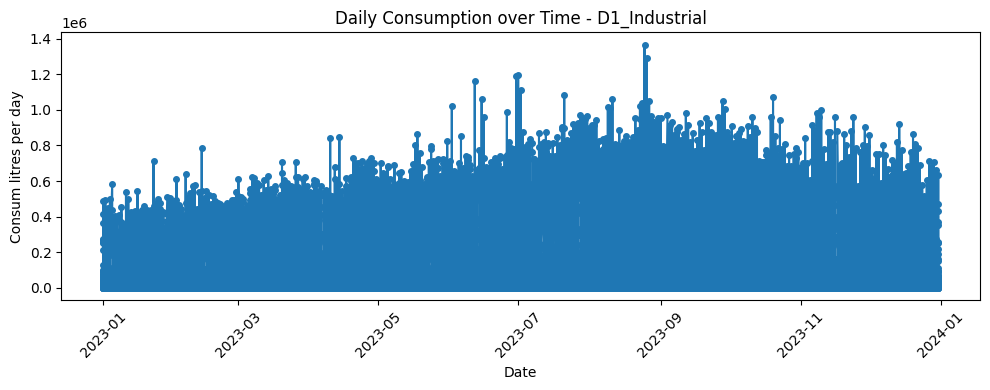

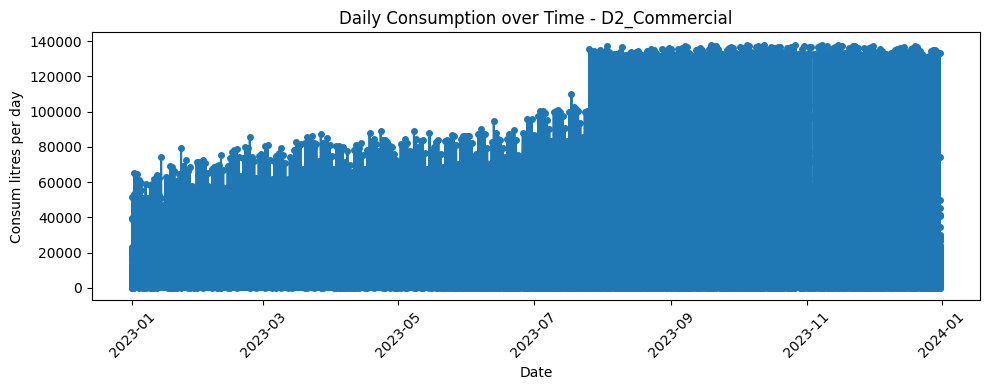

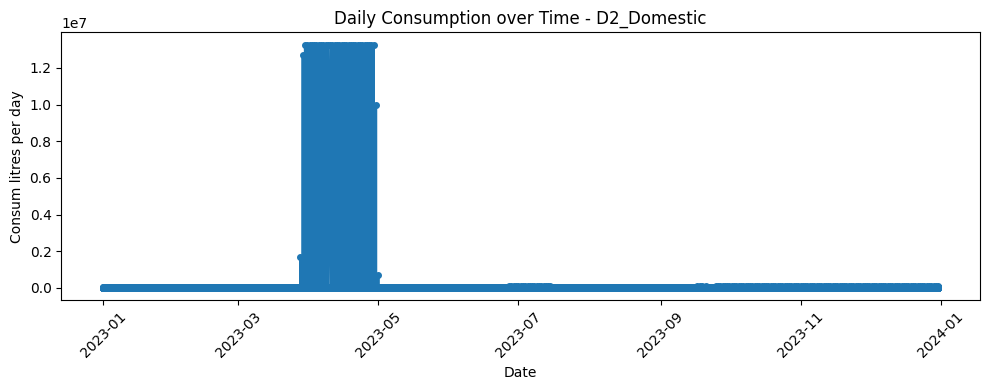

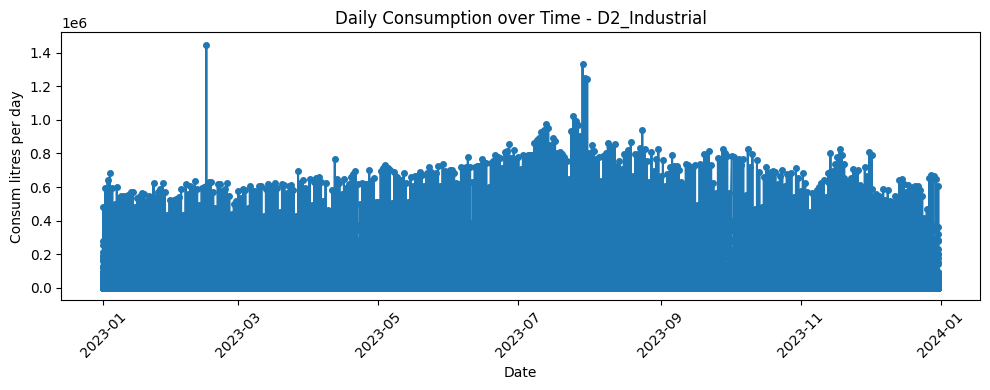

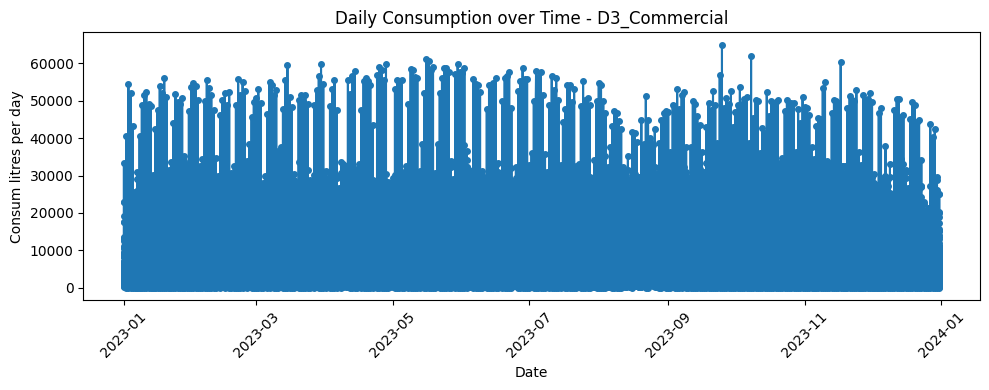

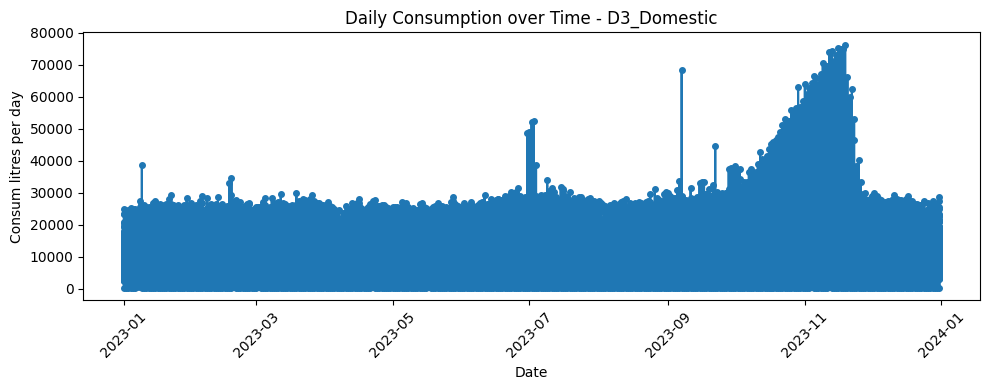

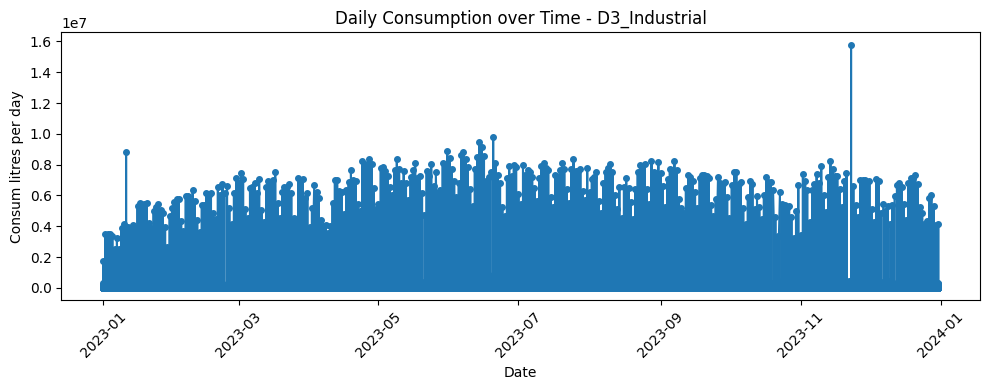

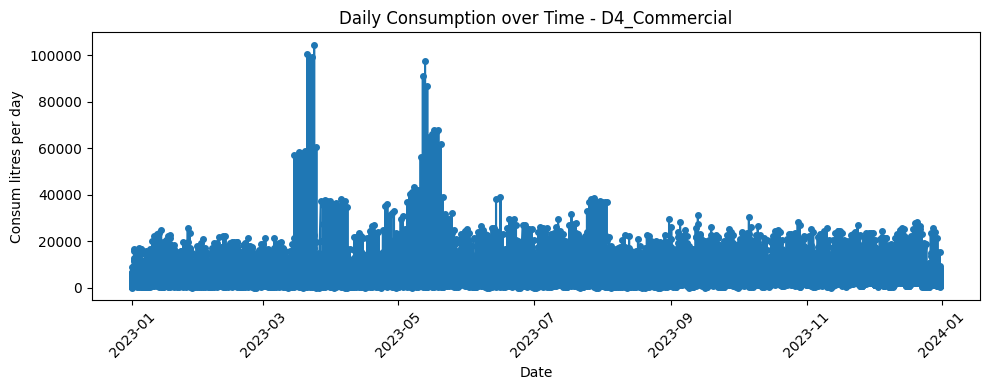

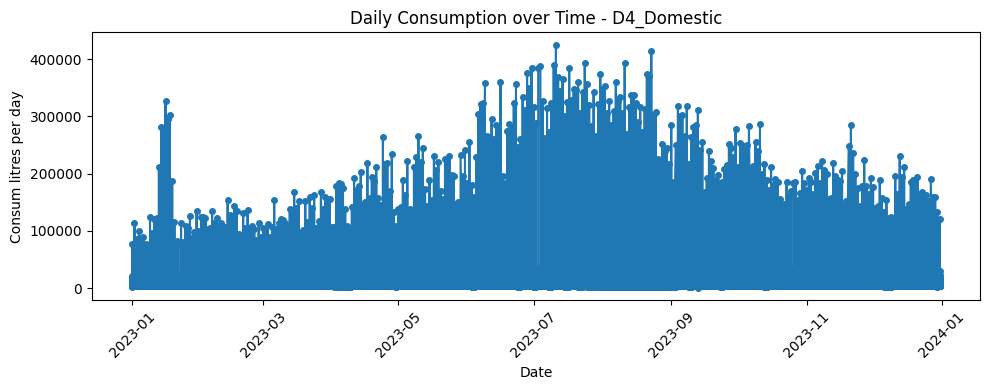

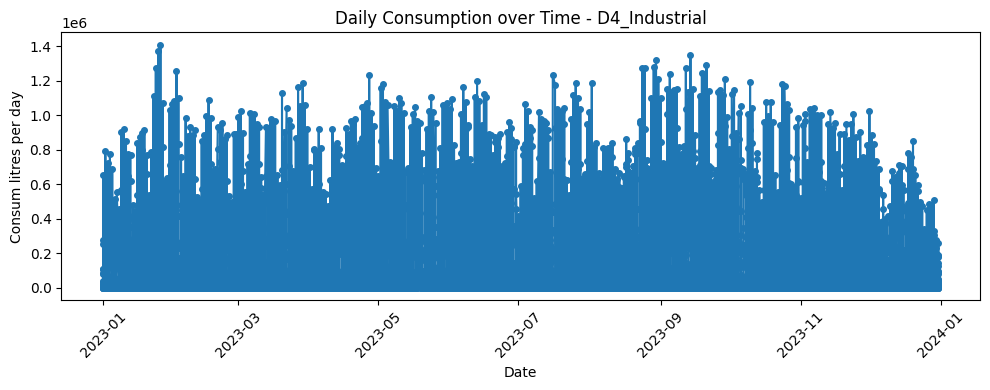

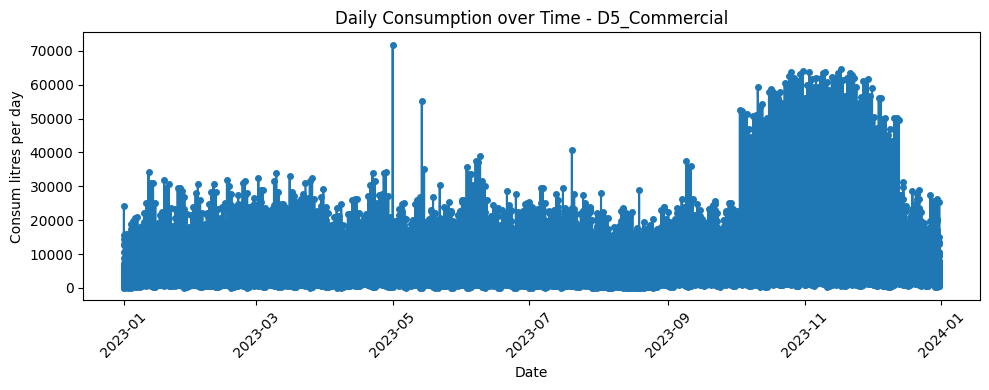

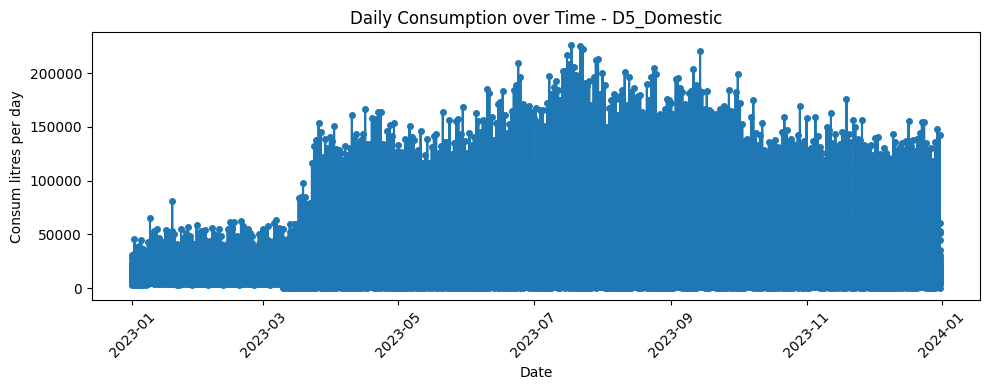

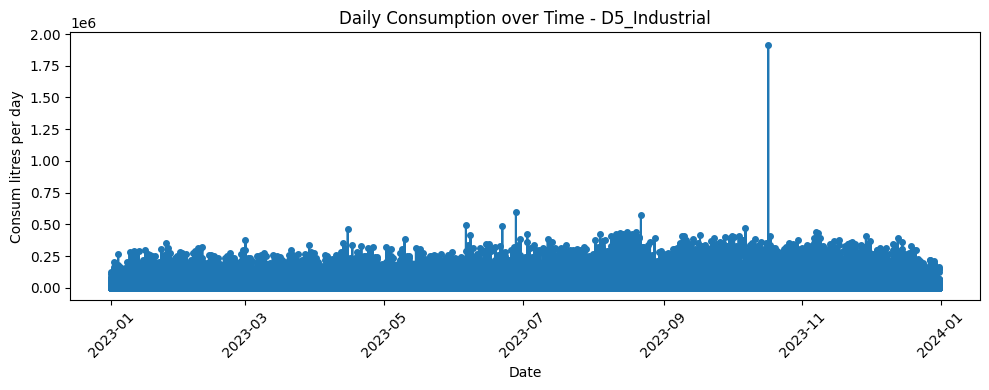

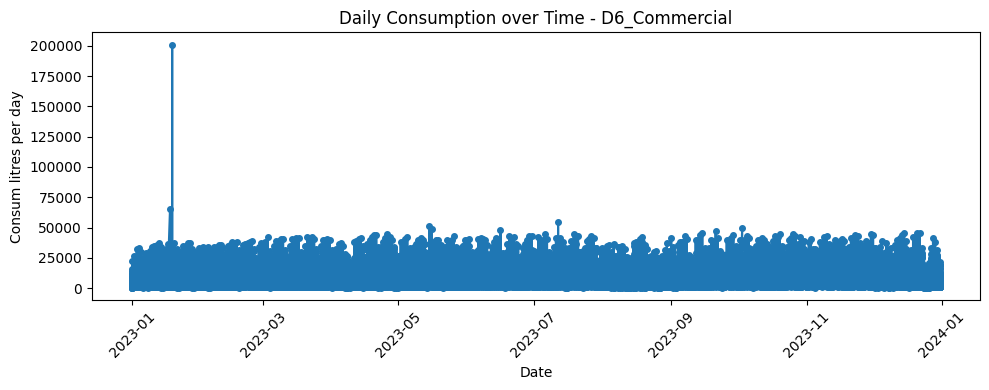

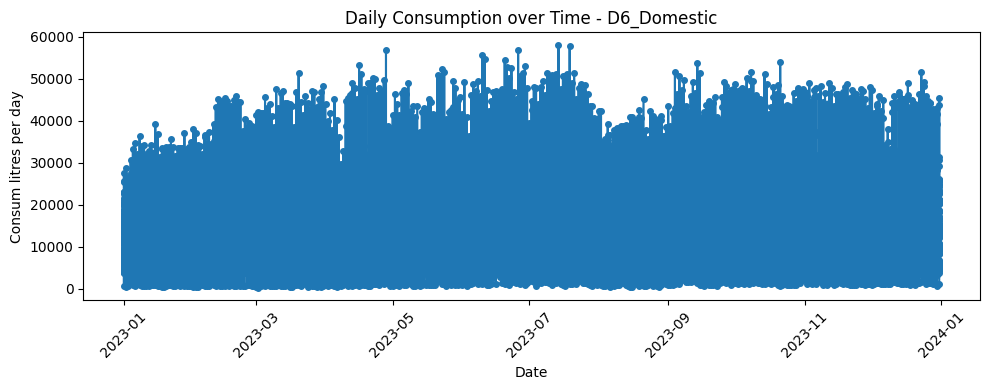

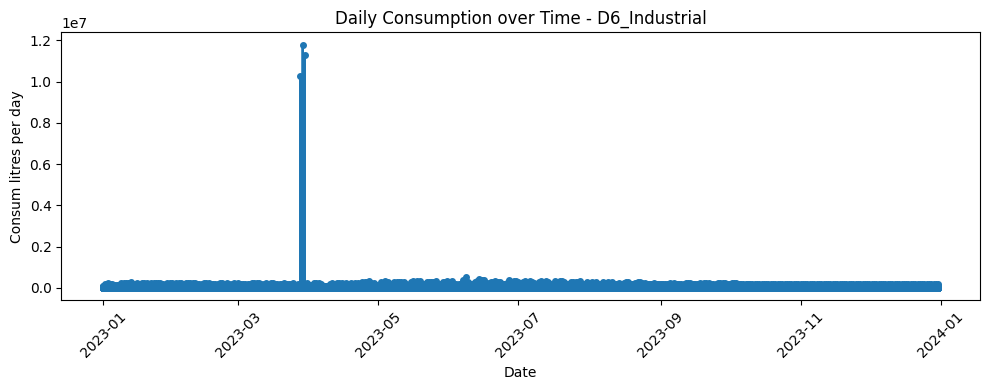

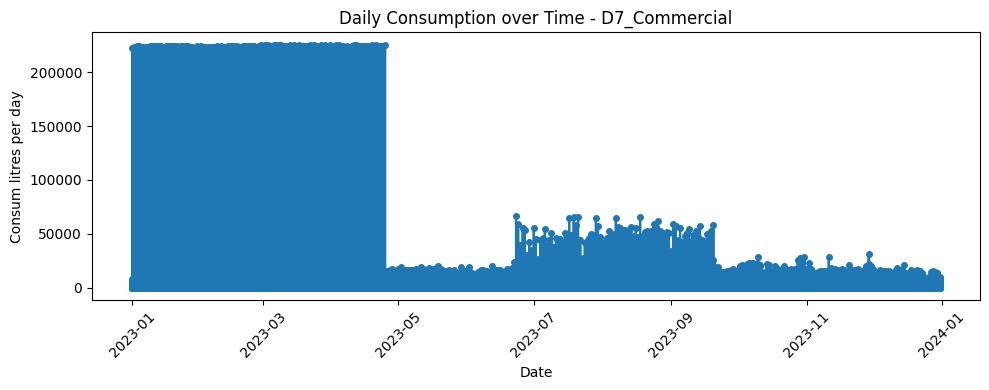

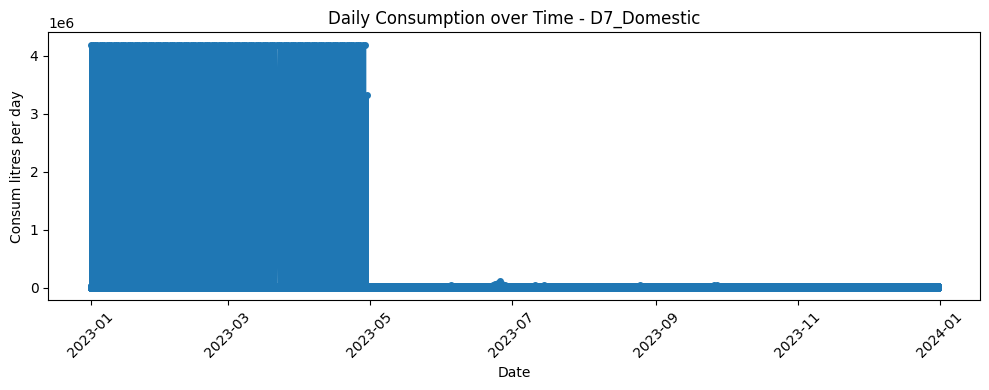

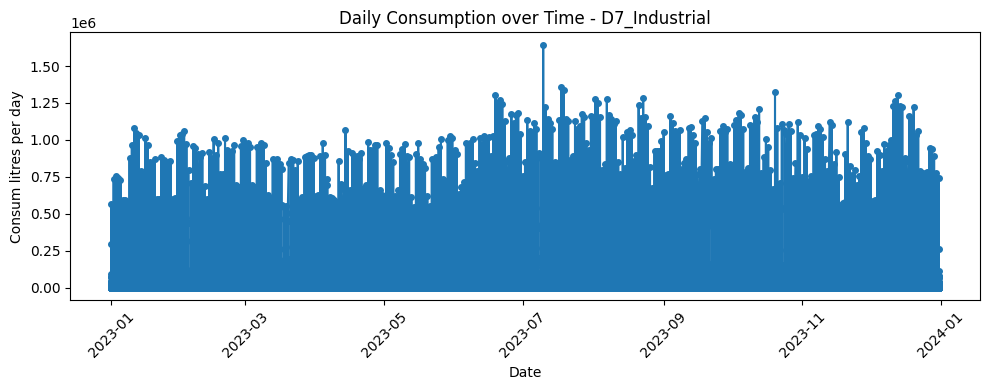

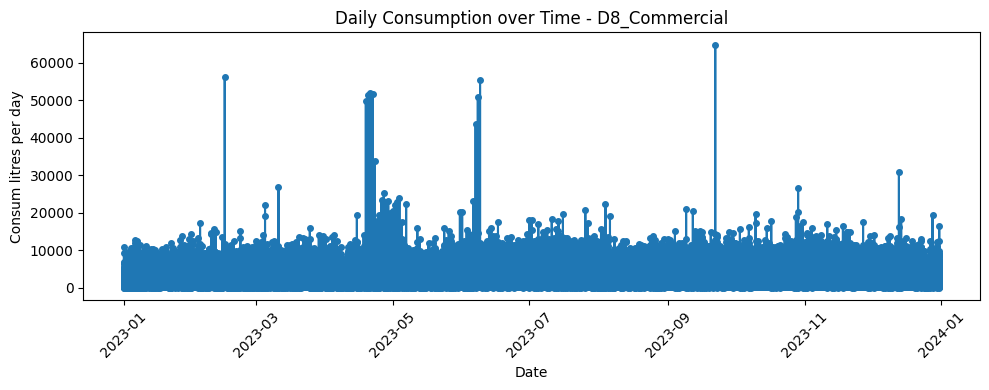

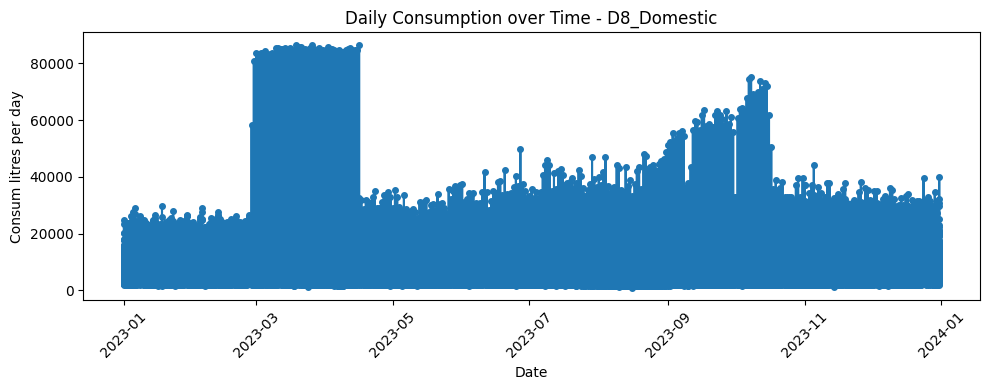

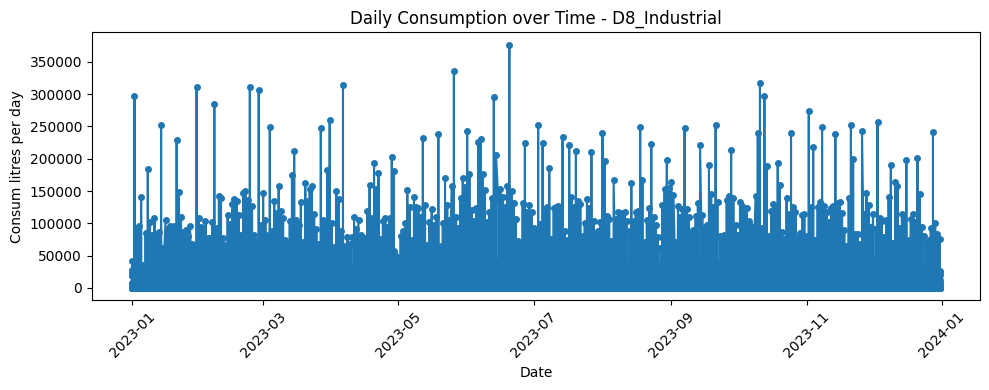

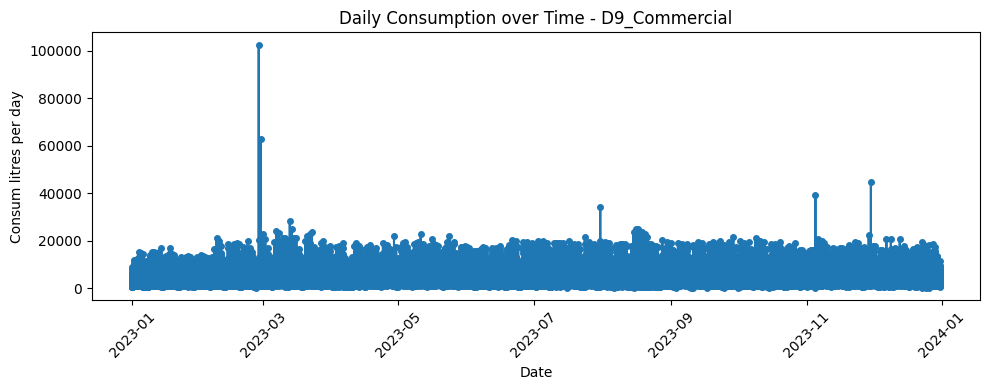

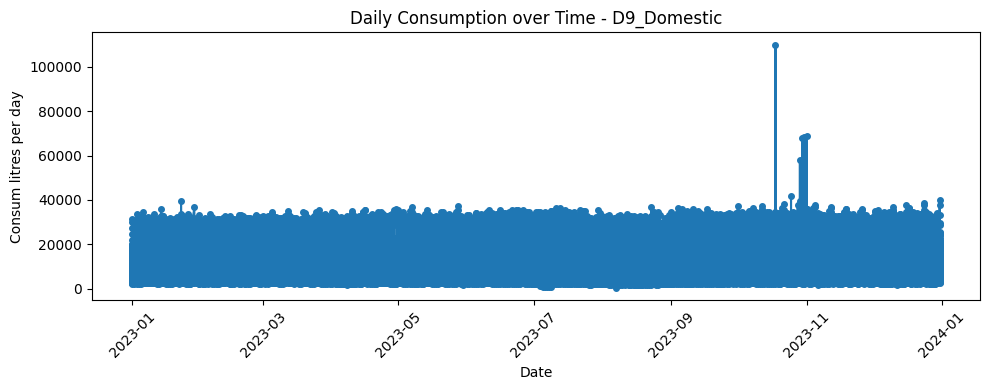

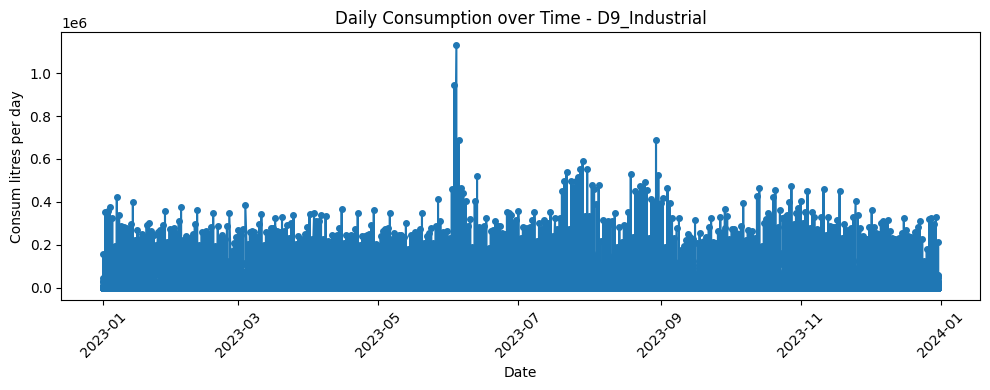

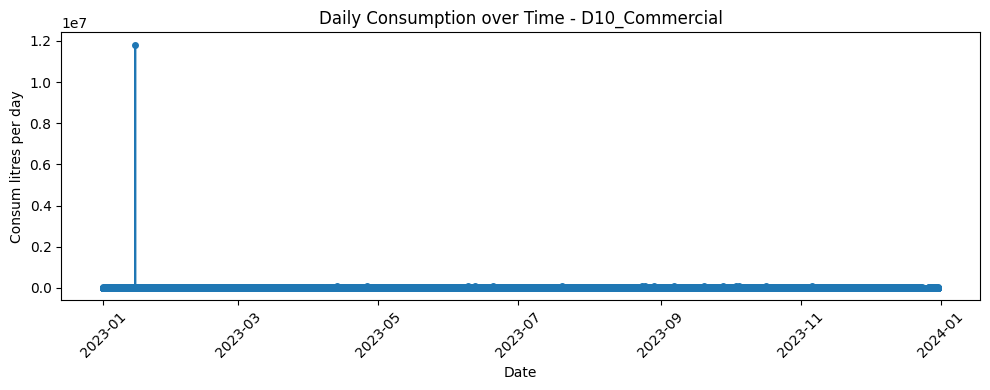

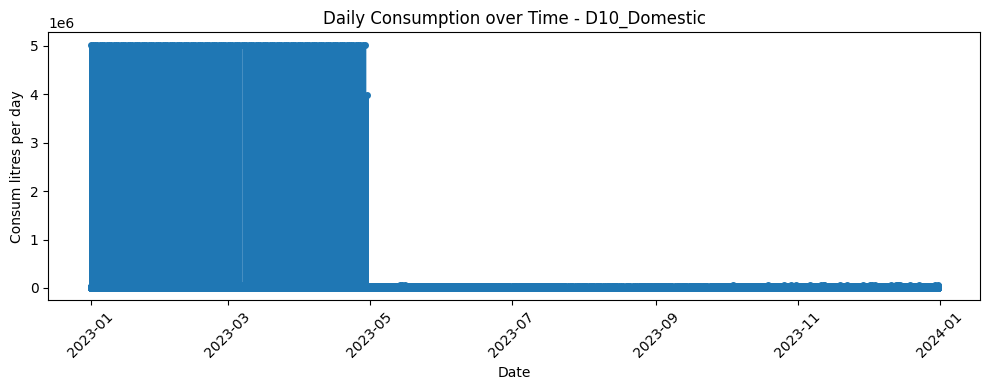

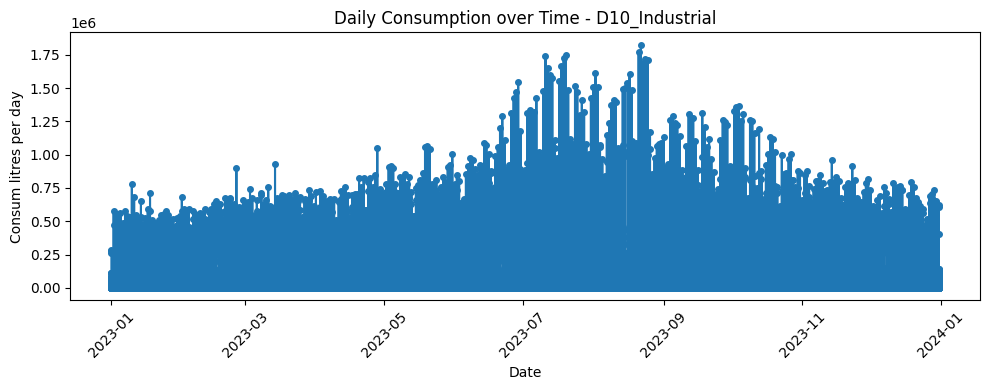

In [ ]:
for key, table in tables.items():
    table['Data'] = pd.to_datetime(table['Data'], errors='coerce')
    table = table.sort_values('Data')  # sort by date

    plt.figure(figsize=(10,4))
    plt.plot(table['Data'], table['Consum_litres_per_dia'], marker='o', linestyle='-', markersize=4)
    plt.title(f"Daily Consumption over Time - {key}")
    plt.xlabel("Date")
    plt.ylabel("Consum litres per day")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()